# Статистика, DS-поток
## Практическое задание 7


**Правила:**

* Дедлайн **26 октября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash; 7 баллов
* Задача 2 &mdash; 7 баллов
* Задача 3 &mdash; 10 баллов

**Важность задач:**

* *высокая:* задачи 1, 2;
* *обычная:* задача 3.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale=1.5, palette='Set2')
sns.set_style('whitegrid')

import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
%matplotlib inline

__________________
## Задача 1.

Пусть $X_1, ..., X_n$ &mdash; выборка из условного распределения $\mathcal{N}(\theta, \sigma^2)$, $\theta \in \Theta = \mathbb{R}$ и $\theta$ в качестве априорного распределения имеет стандартное распределение Коши со сдвигом. 

Апостериорное распределение вычисляется по формуле:
$$q\left.(t\,\right|\,x) = \frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt},$$ 
где $p_t(x)$ &mdash; плотность распределения $\mathcal{N}(t, \sigma^2)$, а $q(t)$ &mdash; плотность распределения Коши.
Как было сказано на лекции, аналитически интеграл в знаменателе посчитать не удастся. Однако, этот интеграл можно вычислить численно, например, с помощью метода Монте-Карло.

В данном случае, интеграл $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ &mdash; некоторая плотность, можно оценить как  $\frac{1}{k}\sum\limits_{j=1}^k f(\xi_i)$, где $\xi_1, ..., \xi_k$ &mdash; сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Рассмотрим столбец Alcalinity of ash датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. Постройте гистограмму этого признака. Похоже ли, что наше предпложение о его распределении верно?

Выберите параметры априорного распределения некоторым разумным способом, не опираясь на данные. Для этого рекомендуется поискать  информацию в других источниках и по ней сделать предположение о параметрах априорного распределения и $\sigma$. Объясните свой выбор. 

Для выборки, образованной столбцом Alcalinity of ash, посчитайте $c$ &mdash; знаменатель в формуле Байеса. Рассмотрите два подхода:

1. Посчитать исходный интеграл напрямую методом Монте-Карло.

2. Вычислить интеграл в знаменателе апостериорной плотности без учета константы нормального распределения, то есть посчитать следующий интеграл:
$$
\int\limits_\Theta q(t) \prod_{i=1}^n \widetilde{p}_t(x_i)dt,
$$
где $$\widetilde{p}_t(x) = \exp\left({-\frac{\left(x - t\right)^2}{2\sigma^2}}\right)$$
Константа из нормального распределения встречается и в числителе, поэтому, при подчете апостериорной плотности, мы можем ее заранее сократить.

Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$? 

Попробуйте применить оба описанных подхода. Выберите лучший и объясните свой выбор.

**Решение:**

В этой <a href="http://aas.bf.uni-lj.si/september2003/11kosmerl.pdf"> статье </a> приводятся значения для разных вин. В предположении, что у нас вина могут быть разные, то возьмем в качестве среднего для нормального 25, а $\sigma^2 = 5$ (что, кстати, с дальнейшеми данными не супер сходится)

In [3]:
wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
              'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
              'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine = pd.DataFrame(wine_data)
wine.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
149,3,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
50,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150


In [9]:
wine.Class.unique()

array([1, 2, 3])

In [19]:
required = "Alcalinity of ash"
samples = [wine[wine.Class==i][required].to_numpy() for i in range(1, 4)]
print(len(samples))
for sample in samples:
    print(sample.shape)

all_samples = np.hstack(samples)
all_samples.shape

3
(59,)
(71,)
(48,)


(178,)

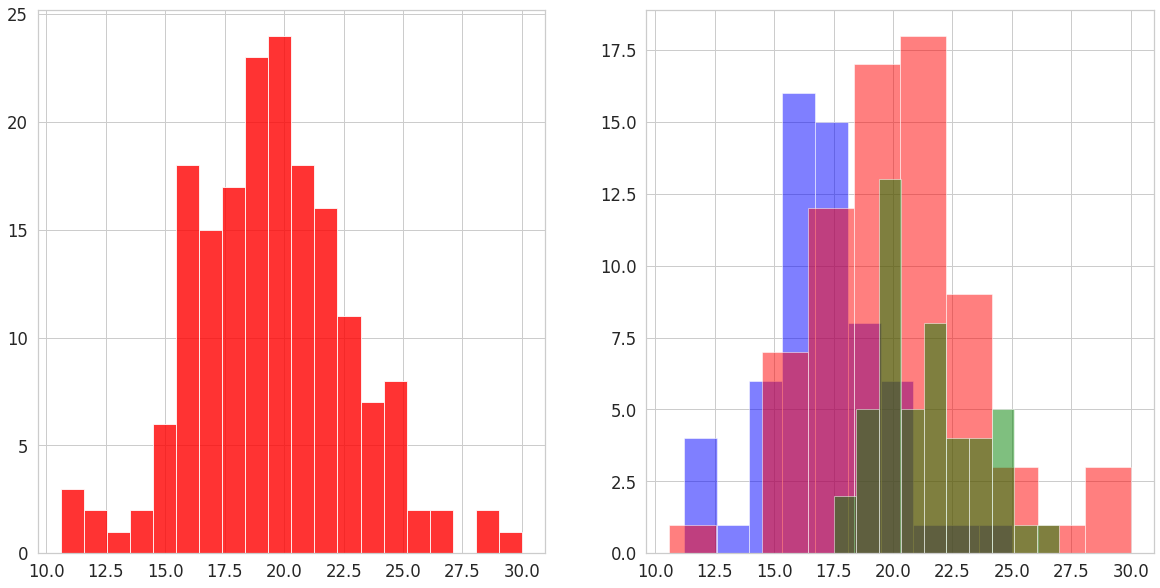

In [36]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(20, 10))

for i, (sample, color) in enumerate(zip(samples, ('b', 'r', 'g'))):
    ax1.hist(sample, bins=10, alpha=0.5, label=f"Выборка типа {i + 1}", color=color)

ax2.hist(all_samples, bins=20, alpha=0.8, label="Все выборки", color="r")

plt.show()

В целом, похоже на нормальное распределение, хотя, если рассматривать у каждого класса по отдельности, то они будут относительно друг друга смещены. Это может быть связано с небольшим размером выборки, либо с тем, что этот параметр действительно зависит от класса (т.е. сорта) винограда


In [41]:
def monte_carlo_int(func, left, right, n):
    '''Вычисление интеграла функции func на отрезке [left, right]
        на n точках из равномерного распределения'''
    points = sps.uniform.rvs(loc=left, scale=(right-left), size=n)
    return (func(points).sum() * (right - left)) / n

In [56]:
a = 25
s2 = 5
s = np.sqrt(s2)
a_priori = sps.cauchy(loc=a)
n = 10000
sample = all_samples

# t - вектор
def q_pdf(t):
    return np.exp(sps.norm.logpdf(loc=t, scale=s, x=sample[:, np.newaxis]).sum()) * a_priori.pdf(t)

# t - вектор
def q_pdf_no_const(t):
  return np.exp(-((sample[:, np.newaxis] - t)**2).sum(axis=0) / (2 * s2)) * a_priori.pdf(t)


points = sps.uniform.rvs(loc=a - 3*s, scale=6*s, size=n)

calc1 = monte_carlo_int(q_pdf, a - 3*s, a + 3*s, n)
calc2 = monte_carlo_int(q_pdf_no_const, a - 3*s, a + 3*s, n)
calc3 = calc2 * (2*np.pi*s2)**(sample.size/2.0)

print(calc1)
print(calc2)
print(calc3)

0.0
8.055534908212098e-89
1.4204732308659209e+45


Для апостериорного распределения, посчитанного по данной выборке одним из методов:
* нарисуйте график плотности;
* посчитайте и выпишите математическое ожидание;
* найдите симметричный (построенный по симметричным квантилям) 95%-ый доверительный интервал.

In [ ]:
<...>

Сделайте вывод о возможности применения метода Монте-Карло для нахождения константы апостериорного распределения. Какие преимущества и недостатки данного метода?

**Вывод:** <...>

__________________
## Задача 2.

Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

**1)** Постройте несколько графиков сопряженного распределения для разных параметров и **охарактеризуйте**, как его значения параметров соотносятся с априорными знаниями о монете.
Можно рассмотреть следующие случаи.
* Монета скорее честная. Тогда наиболее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес неизвестен. Тогда наименее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес в сторону герба. Тогда наиболее вероятны значения $p$ в окрестности $1$.
* Монета скорее честная, либо с небольшим перекосом вправо. Тогда наиболее вероятны значения $p$ в окрестности $\approx 0.6$.
* Ничего не известно. Тогда все значния равновероятны.

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

In [ ]:
<...>

**Вывод:** <...>

Ниже приведена реализация некоторых вспомогательных функций.

In [ ]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    '''
    Рисует серию графиков апостериорных плотностей.
    
    :param grid: сетка для построения графика
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, np.round(post_params[n], 3)), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.title('Апостериорное распределение в зависимости от размера выборки')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    '''
    Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
    
    :param ml: оценка максимального правдоподобия для 1 <= n <= len(sample)
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], 
             label='Bayes', lw=2.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.3)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=2.5)
    plt.title('Оценки параметра в зависимости от размера выборки')
    plt.xlabel('Размер выборки')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [ ]:
def bern_posterior_params(sample, a, b):
    '''
    Находит параметры апостериорного распределения 
        для всех 0 <= n <= len(sample). 
    
    :param sample: выборка
    :param a: параметр alpha априорного распределения
    :param b: параметр beta априорного распределения
    
    :returns: параметры апостериорного
    '''
    
    <...>
    return params

**2)** Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая — параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

In [ ]:
<...>

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия параметра $p$. 

**Вывод:** <...>

__________________
## Задача 3.
 
В заключение вам предлагается творческая задача. Один экзаменатор на экзамене по математической статистике при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ — индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $\min(i+1, 10)$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

Не ограничивайтесь только рассуждениями, не забывайте про визуализации.

In [ ]:
<...>

**Вывод:** <...>